## 합성곱 신경망의 시각화

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 가중치 시각화

In [2]:
from tensorflow import keras

In [3]:
model=keras.models.load_model('best-cnn-model.h5')

In [4]:
model.layers #Conv2D, MaxPooling2D 2번씩 등장, Flatten층->Dense층->Dropout층 마지막에 Dense 층

In [6]:
#첫 번째 합성곱 층의 가중치 조사
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape) #층의 가중치와 절편

(3, 3, 1, 32) (32,)


In [7]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std()) #가중치 평균은 0에 가깝고 표준편차는 약 0.27

-0.030641254 0.27103624


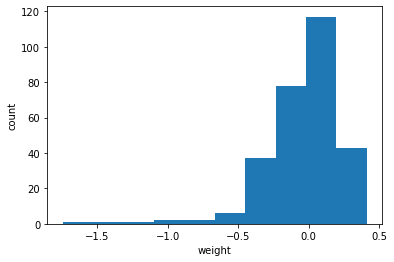

In [9]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1)) #히스토그램을 그리기 위해 1차원 배열로 전달
plt.xlabel('weight') 
plt.ylabel('count')
plt.show()

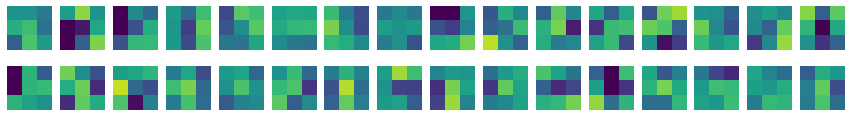

In [10]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [11]:
no_training_model=keras.Sequential() #훈련하지 않은 빈 합성곱 신경망, 가중치가 어떻게 다른지 비교
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [13]:
no_training_conv=no_training_model.layers[0] #첫번째 층(Conv2D층)의 가중치
print(no_training_conv.weights[0].shape) #앞서 출력한 가중치와 같음

(3, 3, 1, 32)


In [14]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std()) #표준편차는 이전보다 훨씬 작아짐

-0.0029798597 0.08092386


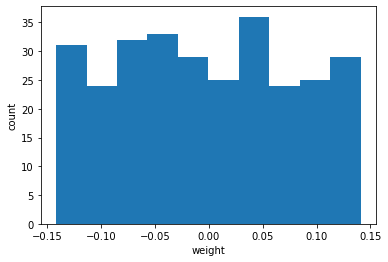

In [15]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() #가중치가 이전보다 고르게 분포되어있음(가중치 처음 초기화할 때 균등분포에서 랜덤하게 값 선택)

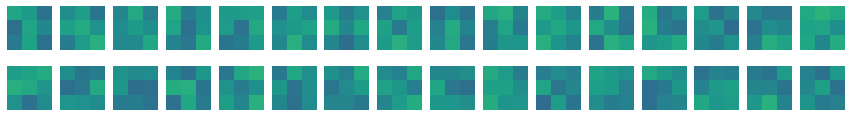

In [16]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

### 함수형 API
딥러닝에서 입력이 2개거나 출력이 2개이면 Sequential 클래스를 사용하기 어렵기 때문에 함수형 API를 사용함<br>
model객체-InputLayer->Conv2D-(활성화 출력)->Maxpooling2D->Conv2D->Maxpooling2D->Flatten->Dense->Dropout->Dense

In [21]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [22]:
conv_acti=keras.Model(model.input,model.layers[0].output)

### 특성 맵 시각화

In [23]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

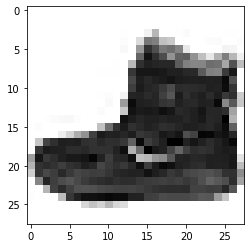

In [24]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [25]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0 #(784,)크기를 (28,28,1)크기로 변경하고 255로 나눔
feature_maps=conv_acti.predict(inputs)

1/1 [==============================] - 0s 64ms/step


In [26]:
print(feature_maps.shape) #세임 패딩과 32개의 필터를 사용한 합성곱층의 출력

(1, 28, 28, 32)


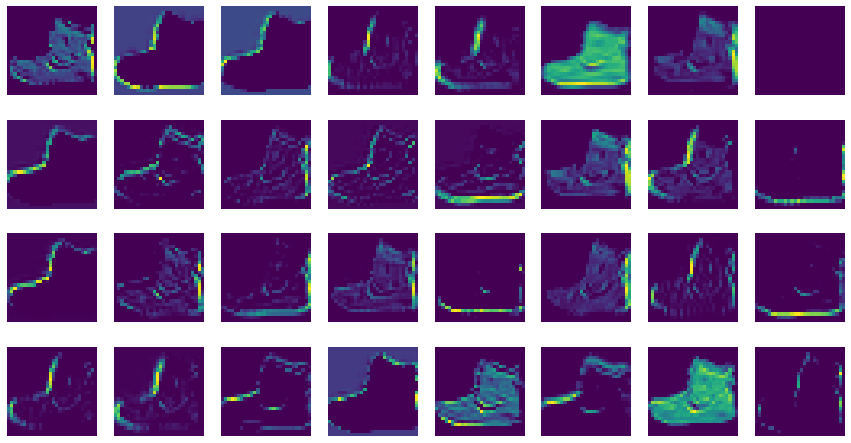

In [27]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4) :
    for j in range(8) :
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줌<br>
* 네번째 필터는 오른쪽에 있는 수직선 감지(강하게 활성화 되어있음)<br>
* 여섯번째 필터는 전체적으로 밝은색이므로 전면이 모두 칠해진 영역 감지<br>
* 세번째 필터는 전체적으로 낮은 음수값, 부츠의 배경이 상대적으로 크게 활성화 될 수 있음

In [28]:
conv2_acti=keras.Model(model.input,model.layers[2].output) #두번째 합성곱 층이 만든 특성맵

In [29]:
feature_maps=conv2_acti.predict(train_input[0:1].reshape(-1,28,28,1)/255.0)

1/1 [==============================] - 0s 35ms/step


In [30]:
print(feature_maps.shape) #첫 번쨰 풀링층에서 가로세로 크기가 절반으로 줄었고 두번째 합성곱 필터 개수 64개

(1, 14, 14, 64)


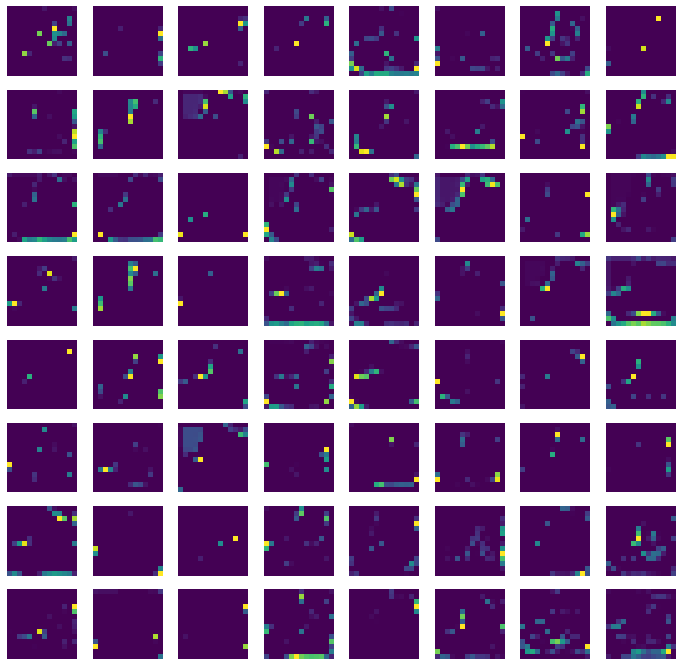

In [31]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()